In [74]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging
tqdm.pandas()
import os
import matplotlib.pyplot as plt

LOGGER = logging.getLogger(__name__)
logging.basicConfig(
    level=logging.INFO,
    filename=os.path.join('/cluster/home/yakram/tan/sbert-local/esco_data_analysis/analysis', 'esco_analysis_EN.log'),
    filemode="w",
    format="%(levelname)s:[%(filename)s:%(lineno)d] - %(message)s [%(asctime)s]",
)


In [75]:
os.getcwd()

'/cluster/home/yakram'

#### Define Result Paths and Load Datasets

In [76]:
RESULTS_PATH = '/cluster/scratch/yakram/sbert_data/turtle_files/german_data/'
LANGUAGE = 'de'

In [77]:
query_SkillsHier_Broader = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_Broader.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_altLabel = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_altLabel.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_hiddenLabel = pd.read_csv(RESULTS_PATH + 'query_MemConcept_hiddenLabel.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_Schemes = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_Schemes.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_BroaderTransitive = pd.read_csv(RESULTS_PATH + 'query_MemConcept_BroaderTransitive.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_description = pd.read_csv(RESULTS_PATH + 'query_MemConcept_description.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_description = pd.read_csv(RESULTS_PATH + 'query_MemConcept_description.rq', index_col='Unnamed: 0', delimiter='\t')  # todo: change the name of thef ifle here
query_MemConcept_TopConceptOf = pd.read_csv(RESULTS_PATH + 'query_MemConcept_TopConceptOf.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_Narrower = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_Narrower.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_Broader = pd.read_csv(RESULTS_PATH + 'query_MemConcept_Broader.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_isOptionalSkillFor = pd.read_csv(RESULTS_PATH + 'query_MemConcept_isOptionalSkillFor.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_altLabel = pd.read_csv(RESULTS_PATH + 'query_MemConcept_altLabel.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_RelatedOptionalSkill = pd.read_csv(RESULTS_PATH + 'query_MemConcept_RelatedOptionalSkill.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_prefLabel = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_prefLabel.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_prefLabel = pd.read_csv(RESULTS_PATH + 'query_MemConcept_prefLabel.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_BroaderTransitive = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_BroaderTransitive.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_isEssentialSkillFor = pd.read_csv(RESULTS_PATH + 'query_MemConcept_isEssentialSkillFor.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_skillReuseLevel = pd.read_csv(RESULTS_PATH + 'query_MemConcept_skillReuseLevel.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_Narrower = pd.read_csv(RESULTS_PATH + 'query_MemConcept_Narrower.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_hiddenLabel = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_hiddenLabel.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_Schemes = pd.read_csv(RESULTS_PATH + 'query_MemConcept_Schemes.rq', index_col='Unnamed: 0', delimiter='\t')
query_MemConcept_SkillType = pd.read_csv(RESULTS_PATH + 'query_MemConcept_skillType.rq', index_col='Unnamed: 0', delimiter='\t')
query_SkillsHier_SkillType = pd.read_csv(RESULTS_PATH + 'query_SkillsHier_skillType.rq', index_col='Unnamed: 0', delimiter='\t')

#### Check the total number of skills and occupations, and check their skill types as defined in the ESCO ontology

In [78]:
query_SkillsHier_Schemes.columns = query_MemConcept_Schemes.columns

In [79]:
MemConcept_schemes_grouped = query_MemConcept_Schemes.groupby('?a')['?schemes'].apply(list)
SkillsHier_schemes_grouped = query_SkillsHier_Schemes.groupby('?a')['?schemes'].apply(list)

MemConcept_schemes = query_MemConcept_prefLabel.merge(MemConcept_schemes_grouped, on='?a', how='left')
SkillsHier_schemes = query_SkillsHier_prefLabel.merge(SkillsHier_schemes_grouped, on='?a', how='left')

In [80]:
def get_concept_scheme(x):
    concept_names = []
    for elem in sorted(x):
        concept_names.append(elem.split('/')[-1])
    return ' '.join(concept_names)

def flag_concept_scheme(x):
    if 'skills' in x:
        return 'skill'
    elif 'occupation' in x:
        return 'occupation'


def get_skilltype_name(x):
    last_uri_word= x.split('/')

    if last_uri_word[-1] == 'knowledge':
        return 'knowledge'
    else:
        return 'skill'

In [81]:
MemConcept_schemes['concept_schemes'] = MemConcept_schemes['?schemes'].progress_apply(get_concept_scheme)
SkillsHier_schemes['concept_schemes'] = SkillsHier_schemes['?schemes'].progress_apply(get_concept_scheme)

Memconcept_SkillsHier_combined = pd.concat([MemConcept_schemes, SkillsHier_schemes], ignore_index=True)

MemConcept_schemes['concept_flag'] = MemConcept_schemes['concept_schemes'].progress_apply(flag_concept_scheme)
Memconcept_SkillsHier_combined['concept_flag'] = Memconcept_SkillsHier_combined['concept_schemes'].progress_apply(flag_concept_scheme)
query_MemConcept_SkillType['skillTypeName'] = query_MemConcept_SkillType['?skillType'].progress_apply(get_skilltype_name)

100%|██████████| 13891/13891 [00:00<00:00, 562211.26it/s]


In [82]:
print(f'For language {LANGUAGE}, the total number of unique skills, combining Member Concepts and Skill Hierarchy, are {Memconcept_SkillsHier_combined["concept_flag"].value_counts()["skill"]},\nThe total number of occupations are {Memconcept_SkillsHier_combined["concept_flag"].value_counts()["occupation"]}')

LOGGER.info(f'For language {LANGUAGE}, the total number of unique skills, combining Member Concepts and Skill Hierarchy, are {Memconcept_SkillsHier_combined["concept_flag"].value_counts()["skill"]},\nThe total number of occupations are {Memconcept_SkillsHier_combined["concept_flag"].value_counts()["occupation"]}')

For language de, the total number of unique skills, combining Member Concepts and Skill Hierarchy, are 14529,
The total number of occupations are 3008


In [83]:
print(f'For language {LANGUAGE}, the total number of skills types only in Member Concept are {MemConcept_schemes["concept_flag"].value_counts()["skill"]} (excluding skills from ISCO specifications),\nand there are {query_MemConcept_SkillType["skillTypeName"].value_counts()["skill"]} URIs with skill type as `skill`, and {query_MemConcept_SkillType["skillTypeName"].value_counts()["knowledge"]} URIs with skill type as `knowledge`')


LOGGER.info(f'For language {LANGUAGE}, the total number of skills types only in Member Concept are {MemConcept_schemes["concept_flag"].value_counts()["skill"]} (excluding skills from ISCO specifications),\nand there are {query_MemConcept_SkillType["skillTypeName"].value_counts()["skill"]} URIs with skill type as `skill`, and {query_MemConcept_SkillType["skillTypeName"].value_counts()["knowledge"]} URIs with skill type as `knowledge`')

For language de, the total number of skills types only in Member Concept are 13891 (excluding skills from ISCO specifications),
and there are 10834 URIs with skill type as `skill`, and 3057 URIs with skill type as `knowledge`
For language de, the total number of skills types only in Member Concept are 13891 (excluding skills from ISCO specifications),
and there are 10834 URIs with skill type as `skill`, and 3057 URIs with skill type as `knowledge`


In [84]:
# todo: arrange all the tabs as per the analysis so that there is a flow in the order of the analysis

#### Combined DataFrame (SKills and MemberConcept) with Preferred, Alt, Hidden and Desc with concept flag

In [85]:
skills_combined_uris = Memconcept_SkillsHier_combined[Memconcept_SkillsHier_combined['concept_flag'] == 'skill']['?a'].values.tolist()
occupation_uris = Memconcept_SkillsHier_combined[Memconcept_SkillsHier_combined['concept_flag'] == 'occupation']['?a'].values.tolist()

In [86]:
assert len(skills_combined_uris) + len(occupation_uris) == Memconcept_SkillsHier_combined.shape[0]

In [87]:
Memconcept_SkillsHier_combined_copy = Memconcept_SkillsHier_combined.copy(deep=True)
Memconcept_SkillsHier_combined_copy.drop(columns=['?schemes', 'concept_schemes'], inplace=True)
Memconcept_SkillsHier_combined_copy

,?a,?prefLabel,concept_flag
0,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill
1,http://data.europa.eu/esco/skill/1a61a520-f4a5...,geschriebenes Irisch verstehen,skill
2,http://data.europa.eu/esco/occupation/9d2aae3e...,Kundenservice-Manager/Kundenservice-Managerin,occupation
3,http://data.europa.eu/esco/skill/f6c10ed9-763a...,mit heißem Stickstoff arbeiten,skill
4,http://data.europa.eu/esco/occupation/f3da16bd...,Großhändler für Blumen und Pflanzen/Großhändle...,occupation
...,...,...,...
17532,http://data.europa.eu/esco/isced-f/0510,Biologische und verwandte Wissenschaften – nic...,skill
17533,http://data.europa.eu/esco/isced-f/0511,Biologie,skill
17534,http://data.europa.eu/esco/isced-f/0920,Soziale Dienste – nicht näher definiert,skill
17535,http://data.europa.eu/esco/isced-f/0512,Biochemie,skill


,?a,?prefLabel,concept_flag
0,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill
1,http://data.europa.eu/esco/skill/1a61a520-f4a5...,geschriebenes Irisch verstehen,skill
2,http://data.europa.eu/esco/occupation/9d2aae3e...,Kundenservice-Manager/Kundenservice-Managerin,occupation
3,http://data.europa.eu/esco/skill/f6c10ed9-763a...,mit heißem Stickstoff arbeiten,skill
4,http://data.europa.eu/esco/occupation/f3da16bd...,Großhändler für Blumen und Pflanzen/Großhändle...,occupation
...,...,...,...
17532,http://data.europa.eu/esco/isced-f/0510,Biologische und verwandte Wissenschaften – nic...,skill
17533,http://data.europa.eu/esco/isced-f/0511,Biologie,skill
17534,http://data.europa.eu/esco/isced-f/0920,Soziale Dienste – nicht näher definiert,skill
17535,http://data.europa.eu/esco/isced-f/0512,Biochemie,skill


In [88]:
MemConcept_SkillsHier_prefLabel = pd.concat([query_MemConcept_prefLabel, query_SkillsHier_prefLabel])
MemConcept_SkillsHier_altLabel = pd.concat([query_MemConcept_altLabel, query_SkillsHier_altLabel])
MemConcept_SkillsHier_hiddenLabel = pd.concat([query_MemConcept_hiddenLabel, query_SkillsHier_hiddenLabel])
MemConcept_SkillsHier_description = pd.concat([query_MemConcept_description, query_SkillsHier_description])

In [89]:
 MemConcept_SkillsHier_prefLabel.columns, MemConcept_SkillsHier_altLabel.columns, MemConcept_SkillsHier_hiddenLabel.columns, MemConcept_SkillsHier_description.columns,

(Index(['?a', '?prefLabel'], dtype='object'),
 Index(['?a', '?altLabel'], dtype='object'),
 Index(['?a', '?hiddenLabel'], dtype='object'),
 Index(['?a', '?desc'], dtype='object'))

(Index(['?a', '?prefLabel'], dtype='object'),
 Index(['?a', '?altLabel'], dtype='object'),
 Index(['?a', '?hiddenLabel'], dtype='object'),
 Index(['?a', '?desc'], dtype='object'))

In [90]:
MemConcept_SkillsHier_pref_alt_hidden_desc = Memconcept_SkillsHier_combined_copy.merge(MemConcept_SkillsHier_altLabel, on='?a', how='left').merge(MemConcept_SkillsHier_hiddenLabel, on='?a', how='left').merge(MemConcept_SkillsHier_description, on='?a', how='left')

In [91]:
MemConcept_SkillsHier_pref_alt_hidden_desc

,?a,?prefLabel,concept_flag,?altLabel,?hiddenLabel,?desc
0,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel lagern,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
1,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel lagern,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
2,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel aufbewahren,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
3,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel aufbewahren,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
4,http://data.europa.eu/esco/skill/1a61a520-f4a5...,geschriebenes Irisch verstehen,skill,Irisch lesen,NaN,Texte auf Irisch lesen und verstehen.
...,...,...,...,...,...,...
76089,http://data.europa.eu/esco/isced-f/0510,Biologische und verwandte Wissenschaften – nic...,skill,NaN,NaN,NaN
76090,http://data.europa.eu/esco/isced-f/0511,Biologie,skill,NaN,NaN,NaN
76091,http://data.europa.eu/esco/isced-f/0920,Soziale Dienste – nicht näher definiert,skill,NaN,NaN,NaN
76092,http://data.europa.eu/esco/isced-f/0512,Biochemie,skill,NaN,NaN,NaN


,?a,?prefLabel,concept_flag,?altLabel,?hiddenLabel,?desc
0,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel lagern,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
1,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel lagern,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
2,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel aufbewahren,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
3,http://data.europa.eu/esco/skill/29b326ea-a9c8...,Lebensmittelrohstoffe lagern,skill,rohe Lebensmittel aufbewahren,NaN,Lagerung von Rohstoffen und anderen Lebensmitt...
4,http://data.europa.eu/esco/skill/1a61a520-f4a5...,geschriebenes Irisch verstehen,skill,Irisch lesen,NaN,Texte auf Irisch lesen und verstehen.
...,...,...,...,...,...,...
76089,http://data.europa.eu/esco/isced-f/0510,Biologische und verwandte Wissenschaften – nic...,skill,NaN,NaN,NaN
76090,http://data.europa.eu/esco/isced-f/0511,Biologie,skill,NaN,NaN,NaN
76091,http://data.europa.eu/esco/isced-f/0920,Soziale Dienste – nicht näher definiert,skill,NaN,NaN,NaN
76092,http://data.europa.eu/esco/isced-f/0512,Biochemie,skill,NaN,NaN,NaN


In [92]:
# todo: complete the analysis after adding the datasets for SkillsHier description, for both english and german data

#### Getting Narrower and Broader URIs for skills dataset, and it's analysis

In [93]:
def create_relationships_data(relationship_df_original, relationship_name):

    relationship_df = relationship_df_original.copy(deep=True)

    original_columns = relationship_df.columns
    relationship_df.columns = ['?MemConcept_uri', '?a']

    merged_relationship_df = relationship_df.merge(query_MemConcept_prefLabel, on=['?a'], how='left').merge(query_MemConcept_altLabel, on='?a', how='left').merge(query_MemConcept_hiddenLabel, on='?a', how='left').merge(query_MemConcept_description, on='?a', how='left')

    merged_relationship_df.rename(columns={'?MemConcept_uri': original_columns[0], '?a': original_columns[1]}, inplace=True)
    new_columns =  [x + relationship_name for x in merged_relationship_df.columns[2:]]
    for index, column in enumerate(merged_relationship_df.columns[2:]):
        merged_relationship_df.rename(columns={column: new_columns[index]}, inplace=True)

    return merged_relationship_df

In [94]:
MemConcept_narrower = create_relationships_data(query_MemConcept_Narrower, 'Narrow')
MemConcept_broader = create_relationships_data(query_MemConcept_Broader, 'Broader')
MemConcept_broaderTransitive = create_relationships_data(query_MemConcept_BroaderTransitive, 'BroaderTrans')
MemConcept_isEssential = create_relationships_data(query_MemConcept_isEssentialSkillFor, 'isEssential')
MemConcept_isOptional = create_relationships_data(query_MemConcept_isOptionalSkillFor, 'isOptional')
MemConcept_relatedOptSkill = create_relationships_data(query_MemConcept_RelatedOptionalSkill, 'relatedOptSkill')

In [95]:
# MemConcept_TopConcept = create_relationships_data(query_MemConcept_TopConceptOf, 'TopConcept')
query_MemConcept_TopConceptOf['top_concept_names'] = query_MemConcept_TopConceptOf['?topConceptOf'].apply(lambda x: x.split('/')[-1])
query_MemConcept_TopConceptOf

,?a,?topConceptOf,top_concept_names
0,http://data.europa.eu/esco/skill/29b326ea-a9c8...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
1,http://data.europa.eu/esco/occupation/9d2aae3e...,http://data.europa.eu/esco/concept-scheme/memb...,member-occupations
2,http://data.europa.eu/esco/skill/f6c10ed9-763a...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
3,http://data.europa.eu/esco/occupation/eaba592d...,http://data.europa.eu/esco/concept-scheme/memb...,member-occupations
4,http://data.europa.eu/esco/skill/5279200c-d6ed...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
...,...,...,...
11166,http://data.europa.eu/esco/skill/5d5f0963-a8b7...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
11167,http://data.europa.eu/esco/skill/32abc65b-333e...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
11168,http://data.europa.eu/esco/skill/25f46432-5ee9...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
11169,http://data.europa.eu/esco/skill/60571d44-dfd4...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills


,?a,?topConceptOf,top_concept_names
0,http://data.europa.eu/esco/skill/29b326ea-a9c8...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
1,http://data.europa.eu/esco/occupation/9d2aae3e...,http://data.europa.eu/esco/concept-scheme/memb...,member-occupations
2,http://data.europa.eu/esco/skill/f6c10ed9-763a...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
3,http://data.europa.eu/esco/occupation/eaba592d...,http://data.europa.eu/esco/concept-scheme/memb...,member-occupations
4,http://data.europa.eu/esco/skill/5279200c-d6ed...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
...,...,...,...
11166,http://data.europa.eu/esco/skill/5d5f0963-a8b7...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
11167,http://data.europa.eu/esco/skill/32abc65b-333e...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
11168,http://data.europa.eu/esco/skill/25f46432-5ee9...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills
11169,http://data.europa.eu/esco/skill/60571d44-dfd4...,http://data.europa.eu/esco/concept-scheme/memb...,member-skills


In [96]:
MemConcept_skillReuseLevel = pd.DataFrame(query_MemConcept_skillReuseLevel.groupby('?a')['?skillReuseLevel'].apply(list)).reset_index()
MemConcept_skillReuseLevel['reuse_level'] = MemConcept_skillReuseLevel['?skillReuseLevel'].progress_apply(get_concept_scheme)
MemConcept_skillReuseLevel

100%|██████████| 13891/13891 [00:00<00:00, 454438.28it/s]


,?a,?skillReuseLevel,reuse_level
0,http://data.europa.eu/esco/skill/0005c151-5b5a...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
1,http://data.europa.eu/esco/skill/00064735-8fad...,[http://data.europa.eu/esco/skill-reuse-level/...,occupation-specific
2,http://data.europa.eu/esco/skill/000709ed-2be5...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
3,http://data.europa.eu/esco/skill/0007bdc2-dd15...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
4,http://data.europa.eu/esco/skill/00090cc1-1f27...,[http://data.europa.eu/esco/skill-reuse-level/...,cross-sector
...,...,...,...
13886,http://data.europa.eu/esco/skill/ffef5eb3-a15e...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
13887,http://data.europa.eu/esco/skill/fff0b074-5a76...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
13888,http://data.europa.eu/esco/skill/fff0e2cd-d0bd...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
13889,http://data.europa.eu/esco/skill/fff5bc45-b506...,[http://data.europa.eu/esco/skill-reuse-level/...,cross-sector


100%|██████████| 13891/13891 [00:00<00:00, 485456.87it/s]


,?a,?skillReuseLevel,reuse_level
0,http://data.europa.eu/esco/skill/0005c151-5b5a...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
1,http://data.europa.eu/esco/skill/00064735-8fad...,[http://data.europa.eu/esco/skill-reuse-level/...,occupation-specific
2,http://data.europa.eu/esco/skill/000709ed-2be5...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
3,http://data.europa.eu/esco/skill/0007bdc2-dd15...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
4,http://data.europa.eu/esco/skill/00090cc1-1f27...,[http://data.europa.eu/esco/skill-reuse-level/...,cross-sector
...,...,...,...
13886,http://data.europa.eu/esco/skill/ffef5eb3-a15e...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
13887,http://data.europa.eu/esco/skill/fff0b074-5a76...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
13888,http://data.europa.eu/esco/skill/fff0e2cd-d0bd...,[http://data.europa.eu/esco/skill-reuse-level/...,sector-specific
13889,http://data.europa.eu/esco/skill/fff5bc45-b506...,[http://data.europa.eu/esco/skill-reuse-level/...,cross-sector


In [97]:
relations_list = [MemConcept_narrower,MemConcept_broader,MemConcept_broaderTransitive,MemConcept_isEssential,MemConcept_isOptional,MemConcept_relatedOptSkill]
relations_name = ["MemConcept_narrower","MemConcept_broader","MemConcept_broaderTransitive","MemConcept_isEssential","MemConcept_isOptional","MemConcept_relatedOptSkill","MemConcept_TopConcept"]

In [98]:
for relation_df, relation_name in zip(relations_list, relations_name):
    print(f'For the dataframe {relation_name}, the unique MemberConcept URIs available are {relation_df["?a"].nunique()} in total dataframe of length {relation_df.shape[0]}, and the label statistics are as follows:\nPrefLabel count: {relation_df[relation_df.columns[2]].nunique()}, '
          f'altLabel count: {relation_df[relation_df.columns[3]].nunique()}, hiddenLabel count: {relation_df[relation_df.columns[4]].nunique()}, desc count: {relation_df[relation_df.columns[5]].nunique()}\n')

For the dataframe MemConcept_narrower, the unique MemberConcept URIs available are 2580 in total dataframe of length 14742, and the label statistics are as follows:
PrefLabel count: 6270, altLabel count: 7113, hiddenLabel count: 525, desc count: 6260

For the dataframe MemConcept_broader, the unique MemberConcept URIs available are 16899 in total dataframe of length 56148, and the label statistics are as follows:
PrefLabel count: 2578, altLabel count: 2660, hiddenLabel count: 527, desc count: 2580

For the dataframe MemConcept_broaderTransitive, the unique MemberConcept URIs available are 16899 in total dataframe of length 129948, and the label statistics are as follows:
PrefLabel count: 2578, altLabel count: 2660, hiddenLabel count: 527, desc count: 2580

For the dataframe MemConcept_isEssential, the unique MemberConcept URIs available are 10970 in total dataframe of length 412640, and the label statistics are as follows:
PrefLabel count: 3133, altLabel count: 14507, hiddenLabel count

In [99]:
# todo: add dataframe logic for skillType logic for all the main URIs

#### Negative Mining

In [100]:
Narrower_groupby = query_MemConcept_Narrower.groupby(by='?a')['?narroweruri'].apply(list).reset_index()
Broader_groupby = query_MemConcept_Broader.groupby(by='?a')['?broaderuri'].apply(list).reset_index()

In [101]:
Narrower_Broader_combined = Narrower_groupby.merge(Broader_groupby, on='?a', how='left')
Narrower_Broader_combined['all_uri_combined'] = Narrower_Broader_combined['?narroweruri'] + Narrower_Broader_combined['?broaderuri']
Narrower_Broader_combined

,?a,?narroweruri,?broaderuri,all_uri_combined
0,http://data.europa.eu/esco/occupation/009d29de...,[http://data.europa.eu/esco/occupation/4e7a364...,[http://data.europa.eu/esco/occupation/3900b68...,[http://data.europa.eu/esco/occupation/4e7a364...
1,http://data.europa.eu/esco/occupation/00c8d1cf...,[http://data.europa.eu/esco/occupation/f7145f8...,[http://data.europa.eu/esco/isco/C7233],[http://data.europa.eu/esco/occupation/f7145f8...
2,http://data.europa.eu/esco/occupation/00cee175...,[http://data.europa.eu/esco/occupation/3a15ec1...,[http://data.europa.eu/esco/isco/C8331],[http://data.europa.eu/esco/occupation/3a15ec1...
3,http://data.europa.eu/esco/occupation/02eb0ae6...,[http://data.europa.eu/esco/occupation/c5d36ee...,[http://data.europa.eu/esco/isco/C2153],[http://data.europa.eu/esco/occupation/c5d36ee...
4,http://data.europa.eu/esco/occupation/03d79393...,[http://data.europa.eu/esco/occupation/3b755cd...,[http://data.europa.eu/esco/isco/C2341],[http://data.europa.eu/esco/occupation/3b755cd...
...,...,...,...,...
2575,http://data.europa.eu/esco/skill/ff9b7465-c37a...,[http://data.europa.eu/esco/skill/9ad3c429-04d...,[http://data.europa.eu/esco/isced-f/0713],[http://data.europa.eu/esco/skill/9ad3c429-04d...
2576,http://data.europa.eu/esco/skill/ff9ed77c-f19c...,[http://data.europa.eu/esco/skill/b94bc156-74b...,[http://data.europa.eu/esco/skill/S6.3.6],[http://data.europa.eu/esco/skill/b94bc156-74b...
2577,http://data.europa.eu/esco/skill/ffc69c38-ce70...,[http://data.europa.eu/esco/skill/c10d0ba2-e22...,[http://data.europa.eu/esco/skill/S8.2.3],[http://data.europa.eu/esco/skill/c10d0ba2-e22...
2578,http://data.europa.eu/esco/skill/ffe9b8ef-f32a...,[http://data.europa.eu/esco/skill/bfdfba8e-5ce...,[http://data.europa.eu/esco/skill/S1.6.3],[http://data.europa.eu/esco/skill/bfdfba8e-5ce...


,?a,?narroweruri,?broaderuri,all_uri_combined
0,http://data.europa.eu/esco/occupation/009d29de...,[http://data.europa.eu/esco/occupation/4e7a364...,[http://data.europa.eu/esco/occupation/3900b68...,[http://data.europa.eu/esco/occupation/4e7a364...
1,http://data.europa.eu/esco/occupation/00c8d1cf...,[http://data.europa.eu/esco/occupation/f7145f8...,[http://data.europa.eu/esco/isco/C7233],[http://data.europa.eu/esco/occupation/f7145f8...
2,http://data.europa.eu/esco/occupation/00cee175...,[http://data.europa.eu/esco/occupation/3a15ec1...,[http://data.europa.eu/esco/isco/C8331],[http://data.europa.eu/esco/occupation/3a15ec1...
3,http://data.europa.eu/esco/occupation/02eb0ae6...,[http://data.europa.eu/esco/occupation/c5d36ee...,[http://data.europa.eu/esco/isco/C2153],[http://data.europa.eu/esco/occupation/c5d36ee...
4,http://data.europa.eu/esco/occupation/03d79393...,[http://data.europa.eu/esco/occupation/3b755cd...,[http://data.europa.eu/esco/isco/C2341],[http://data.europa.eu/esco/occupation/3b755cd...
...,...,...,...,...
2575,http://data.europa.eu/esco/skill/ff9b7465-c37a...,[http://data.europa.eu/esco/skill/9ad3c429-04d...,[http://data.europa.eu/esco/isced-f/0713],[http://data.europa.eu/esco/skill/9ad3c429-04d...
2576,http://data.europa.eu/esco/skill/ff9ed77c-f19c...,[http://data.europa.eu/esco/skill/b94bc156-74b...,[http://data.europa.eu/esco/skill/S6.3.6],[http://data.europa.eu/esco/skill/b94bc156-74b...
2577,http://data.europa.eu/esco/skill/ffc69c38-ce70...,[http://data.europa.eu/esco/skill/c10d0ba2-e22...,[http://data.europa.eu/esco/skill/S8.2.3],[http://data.europa.eu/esco/skill/c10d0ba2-e22...
2578,http://data.europa.eu/esco/skill/ffe9b8ef-f32a...,[http://data.europa.eu/esco/skill/bfdfba8e-5ce...,[http://data.europa.eu/esco/skill/S1.6.3],[http://data.europa.eu/esco/skill/bfdfba8e-5ce...


In [102]:
narroweruri_unique = query_MemConcept_Narrower['?narroweruri'].unique().tolist()
broaderuri_unique = query_MemConcept_Broader['?broaderuri'].unique().tolist()
narrower_broader_uris_combined = list(set(narroweruri_unique + broaderuri_unique))
narrower_broader_mapping = Narrower_Broader_combined[['?a', 'all_uri_combined']].to_dict(orient='records')

In [103]:
def mine_negatives(x):

    negative_uris = []
    remaining_uris = list(set(narrower_broader_uris_combined) - set(x))

    for record in narrower_broader_mapping:
        main_uri_narrower_broader = record['all_uri_combined']

        if set(main_uri_narrower_broader).issubset(remaining_uris):
            negative_uris.append(record['?a'])

    return negative_uris


In [104]:
MemConcept_negative_uri = pd.read_csv('/cluster/scratch/yakram/sbert_data/turtle_files/Negative_mined.csv', delimiter='\t')

In [105]:
MemConcept_negative_uri.head()

,Unnamed: 0,?a,?narroweruri,?broaderuri,all_uri_combined,negative_uris
0,0,http://data.europa.eu/esco/occupation/009d29de...,['http://data.europa.eu/esco/occupation/4e7a36...,['http://data.europa.eu/esco/occupation/3900b6...,['http://data.europa.eu/esco/occupation/4e7a36...,['http://data.europa.eu/esco/occupation/00c8d1...
1,1,http://data.europa.eu/esco/occupation/00c8d1cf...,['http://data.europa.eu/esco/occupation/f7145f...,['http://data.europa.eu/esco/isco/C7233'],['http://data.europa.eu/esco/occupation/f7145f...,['http://data.europa.eu/esco/occupation/009d29...
2,2,http://data.europa.eu/esco/occupation/00cee175...,['http://data.europa.eu/esco/occupation/3a15ec...,['http://data.europa.eu/esco/isco/C8331'],['http://data.europa.eu/esco/occupation/3a15ec...,['http://data.europa.eu/esco/occupation/009d29...
3,3,http://data.europa.eu/esco/occupation/02eb0ae6...,['http://data.europa.eu/esco/occupation/c5d36e...,['http://data.europa.eu/esco/isco/C2153'],['http://data.europa.eu/esco/occupation/c5d36e...,['http://data.europa.eu/esco/occupation/009d29...
4,4,http://data.europa.eu/esco/occupation/03d79393...,['http://data.europa.eu/esco/occupation/3b755c...,['http://data.europa.eu/esco/isco/C2341'],['http://data.europa.eu/esco/occupation/3b755c...,['http://data.europa.eu/esco/occupation/009d29...


,Unnamed: 0,?a,?narroweruri,?broaderuri,all_uri_combined,negative_uris
0,0,http://data.europa.eu/esco/occupation/009d29de...,['http://data.europa.eu/esco/occupation/4e7a36...,['http://data.europa.eu/esco/occupation/3900b6...,['http://data.europa.eu/esco/occupation/4e7a36...,['http://data.europa.eu/esco/occupation/00c8d1...
1,1,http://data.europa.eu/esco/occupation/00c8d1cf...,['http://data.europa.eu/esco/occupation/f7145f...,['http://data.europa.eu/esco/isco/C7233'],['http://data.europa.eu/esco/occupation/f7145f...,['http://data.europa.eu/esco/occupation/009d29...
2,2,http://data.europa.eu/esco/occupation/00cee175...,['http://data.europa.eu/esco/occupation/3a15ec...,['http://data.europa.eu/esco/isco/C8331'],['http://data.europa.eu/esco/occupation/3a15ec...,['http://data.europa.eu/esco/occupation/009d29...
3,3,http://data.europa.eu/esco/occupation/02eb0ae6...,['http://data.europa.eu/esco/occupation/c5d36e...,['http://data.europa.eu/esco/isco/C2153'],['http://data.europa.eu/esco/occupation/c5d36e...,['http://data.europa.eu/esco/occupation/009d29...
4,4,http://data.europa.eu/esco/occupation/03d79393...,['http://data.europa.eu/esco/occupation/3b755c...,['http://data.europa.eu/esco/isco/C2341'],['http://data.europa.eu/esco/occupation/3b755c...,['http://data.europa.eu/esco/occupation/009d29...


#### Plots of Analysis

[Text(0, 0, '14529'), Text(0, 0, '3008')]

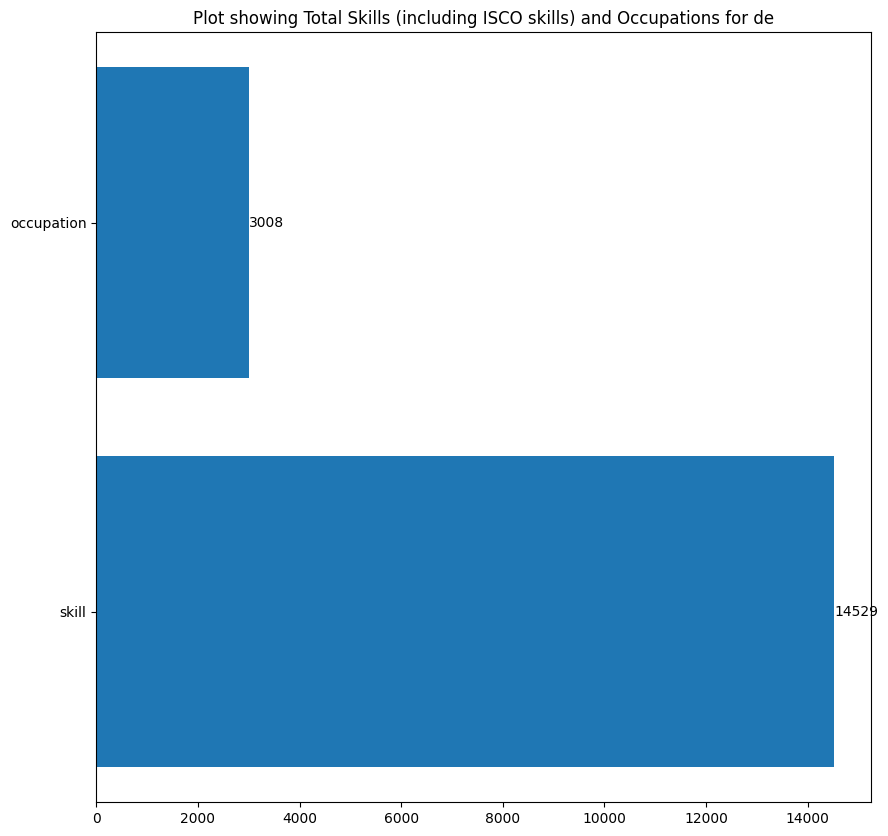

[Text(0, 0, '14529'), Text(0, 0, '3008')]

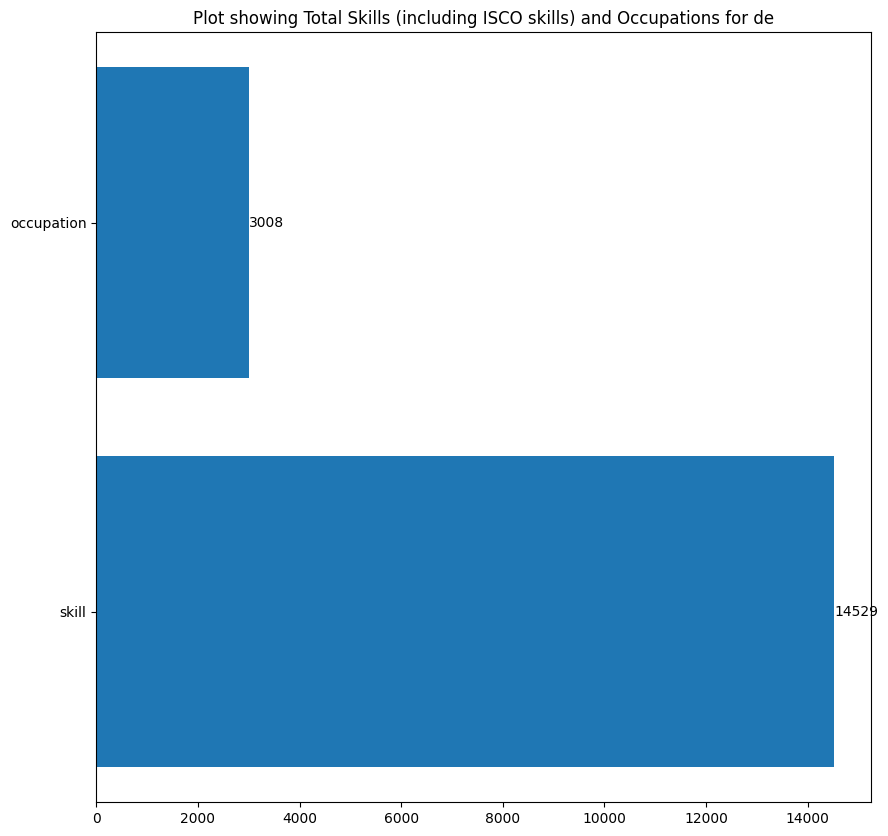

In [106]:
indexes = ['skill', 'occupation']
unq_skills = Memconcept_SkillsHier_combined["concept_flag"].value_counts()["skill"]
unq_occupations = Memconcept_SkillsHier_combined["concept_flag"].value_counts()["occupation"]
values = [unq_skills, unq_occupations]

fig, ax = plt.subplots(figsize = (10,10))
bars = ax.barh(indexes, values)
plt.title(f'Plot showing Total Skills (including ISCO skills) and Occupations for {LANGUAGE}')
ax.bar_label(bars)

[Text(0, 0, '10834'), Text(0, 0, '3057')]

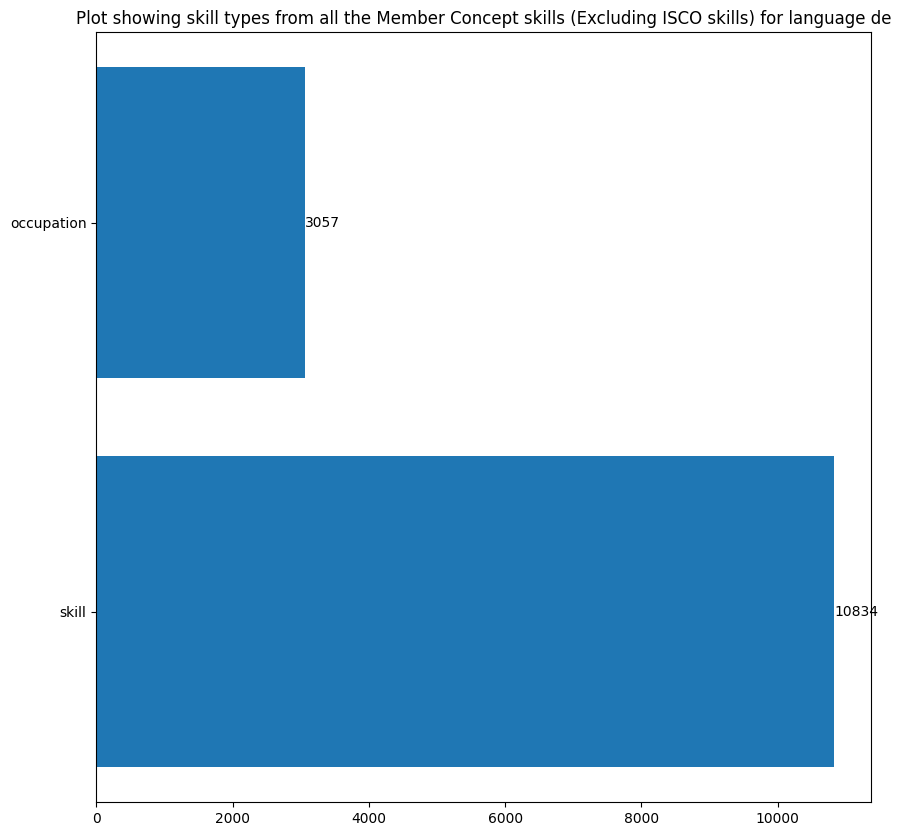

[Text(0, 0, '10834'), Text(0, 0, '3057')]

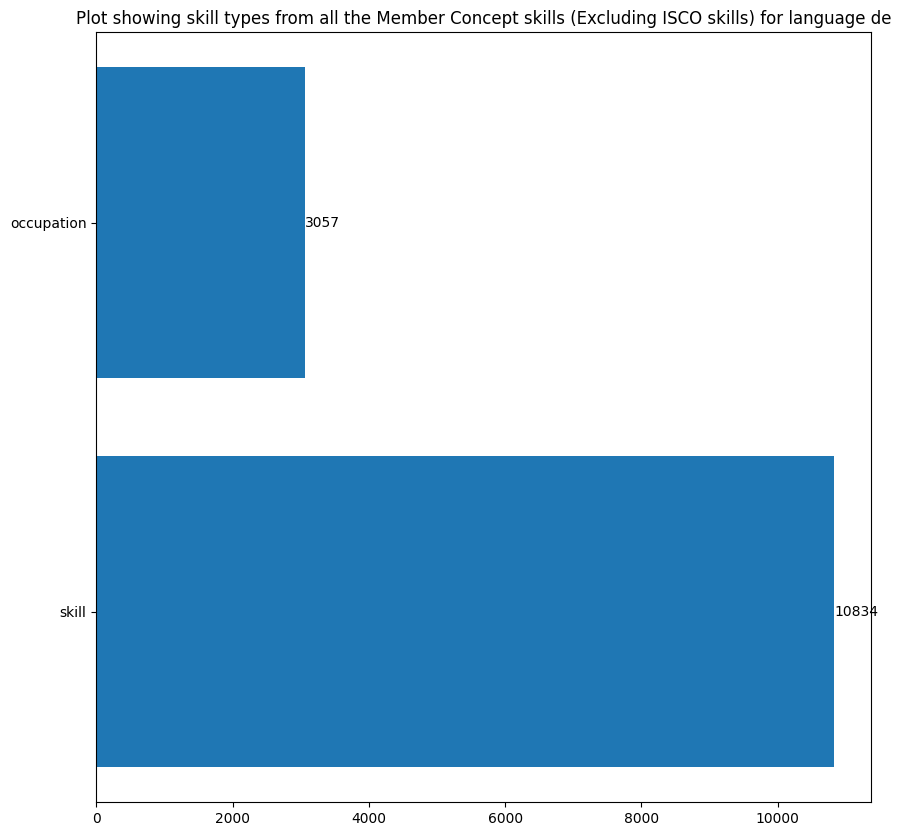

In [107]:
indexes = ['skill', 'occupation']
count_skills = query_MemConcept_SkillType["skillTypeName"].value_counts()["skill"]
count_knowledge = query_MemConcept_SkillType["skillTypeName"].value_counts()["knowledge"]
values = [count_skills, count_knowledge]

fig, ax = plt.subplots(figsize = (10,10))
bars = ax.barh(indexes, values)
plt.title(f'Plot showing skill types from all the Member Concept skills (Excluding ISCO skills) for language {LANGUAGE}')
ax.bar_label(bars)

[Text(0, 0, '17537'),
 Text(0, 0, '17394'),
 Text(0, 0, '19570'),
 Text(0, 0, '1468'),
 Text(0, 0, '16880')]

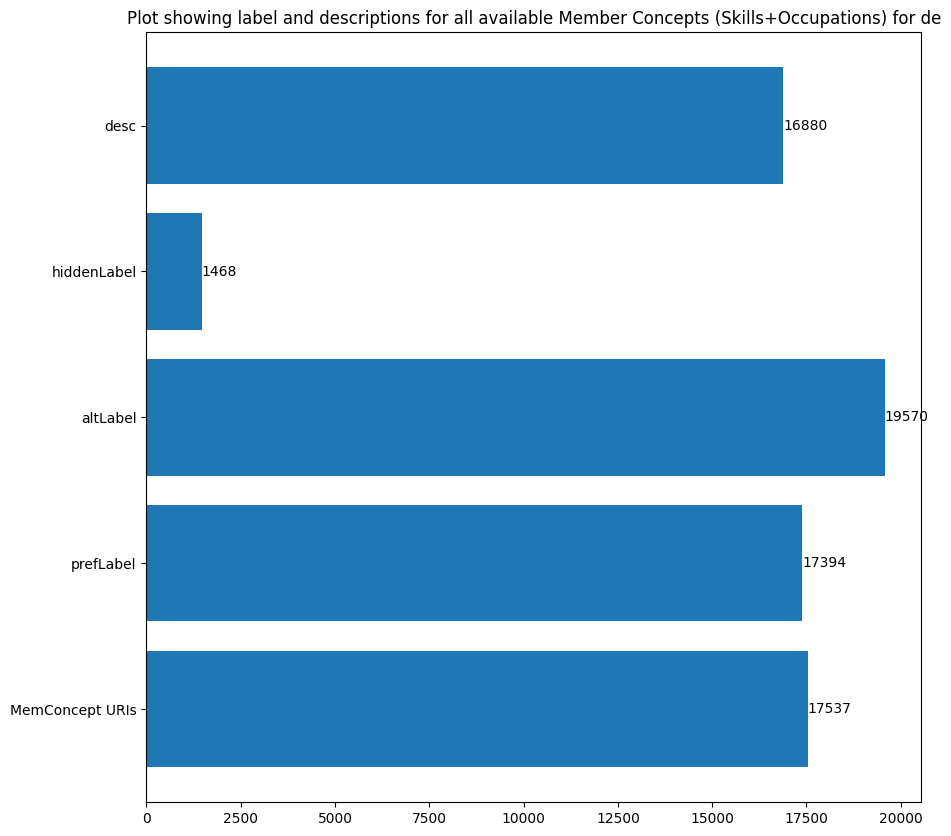

[Text(0, 0, '17537'),
 Text(0, 0, '17394'),
 Text(0, 0, '19570'),
 Text(0, 0, '1468'),
 Text(0, 0, '16880')]

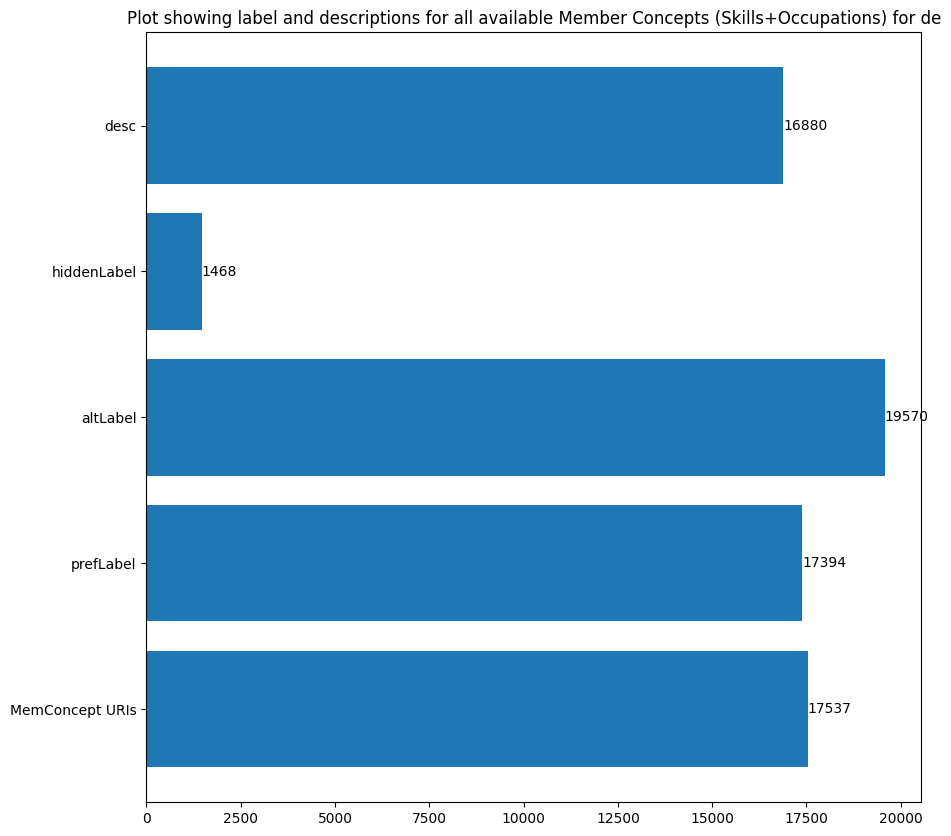

In [108]:
indexes = ['MemConcept URIs', 'prefLabel', 'altLabel', 'hiddenLabel', 'desc']
values = []
for column in MemConcept_SkillsHier_pref_alt_hidden_desc.columns:
    if column != 'concept_flag':
        values.append(MemConcept_SkillsHier_pref_alt_hidden_desc[column].nunique())

fig, ax = plt.subplots(figsize = (10,10))
bars = ax.barh(indexes, values)
plt.title(f'Plot showing label and descriptions for all available Member Concepts (Skills+Occupations) for {LANGUAGE}')
ax.bar_label(bars)

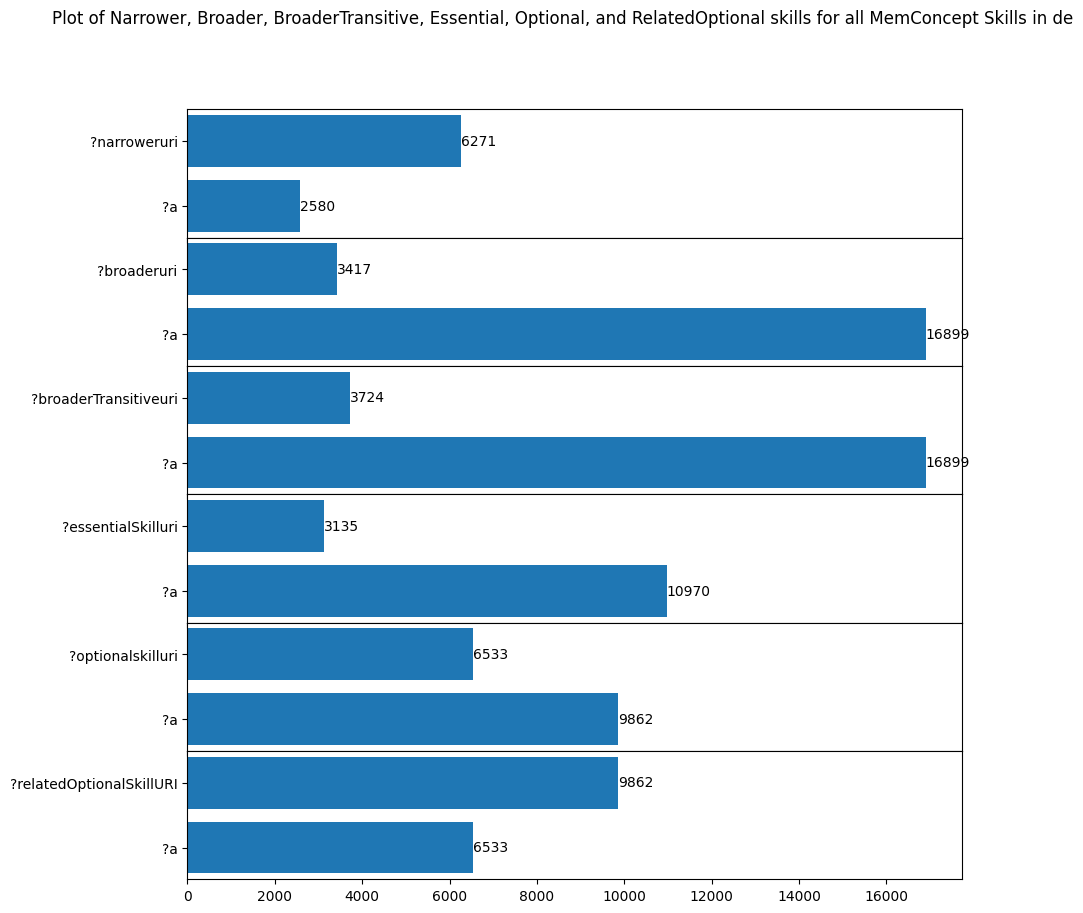

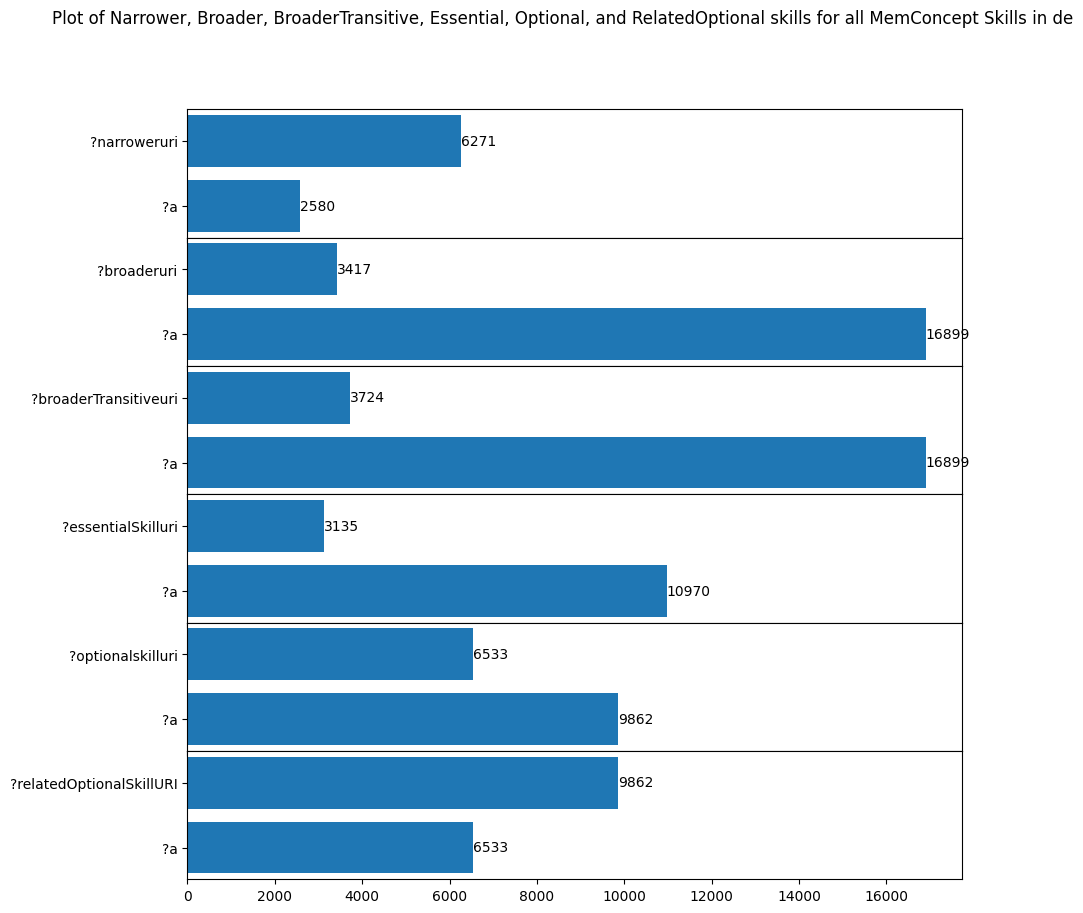

In [109]:
value_df = [query_MemConcept_Narrower, query_MemConcept_Broader, query_MemConcept_BroaderTransitive, query_MemConcept_isEssentialSkillFor, query_MemConcept_isOptionalSkillFor, query_MemConcept_RelatedOptionalSkill]
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(6, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle(f'Plot of Narrower, Broader, BroaderTransitive, Essential, Optional, and RelatedOptional skills for all MemConcept Skills in {LANGUAGE}')

for idx, df in enumerate(value_df):
    values = [df.nunique()[df.columns[0]], df.nunique()[df.columns[1]]]
    indexes = df.columns
    bars = axs[idx].barh(indexes, values)
    axs[idx].bar_label(bars)

